In [3]:
import numpy as np
import matplotlib.pyplot as plt

# K-means

Text(0, 0.5, 'Feature 2')

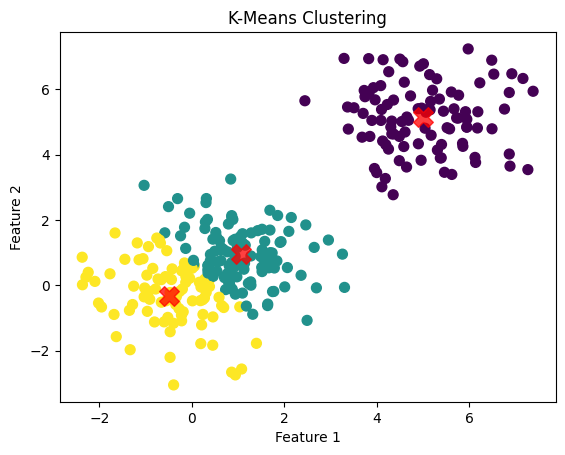

In [9]:
np.random.seed(0)
#Generate data
X = np.random.randn(300, 2)
X[:100] += 5  
X[100:200] += 1  

def kmeans(X, k, max_iters=100):
    # Randomly initialize cluster centers
    centers = X[np.random.choice(X.shape[0], k, replace=False)]
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
        labels = np.argmin(distances, axis=1)
        # Recalculate the cluster centers
        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.all(centers == new_centers):
            break
        centers = new_centers 
    return labels, centers

k = 3
labels, centers = kmeans(X, k)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


# Support Vector Machine (SVM)

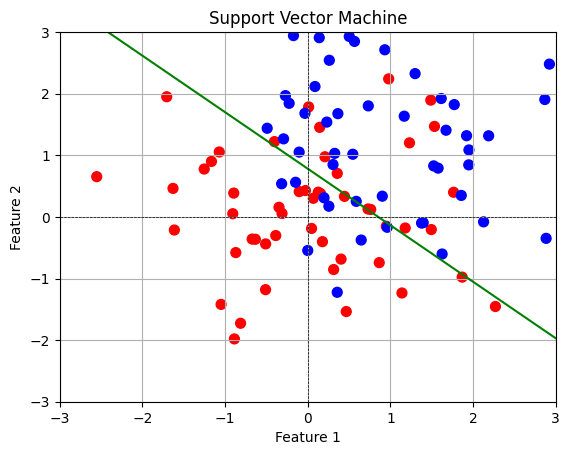

In [10]:
# Generate binary data
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.array([1] * 50 + [-1] * 50)
X[y == -1] += 1  # Shift the second class

def svm(X, y, max_iters=1000, learning_rate=0.01):
    w = np.zeros(X.shape[1])  # Weight vector
    b = 0 
    for _ in range(max_iters):
        for i in range(X.shape[0]):
            # Check if the data point is misclassified
            if y[i] * (np.dot(X[i], w) + b) < 1:
                w += learning_rate * (y[i] * X[i] - 2 * (1 / max_iters) * w)
                b += learning_rate * y[i]
            else:
                w -= learning_rate * (2 * (1 / max_iters) * w)
    return w, b

# Train the SVM
w, b = svm(X, y)

# Plotting the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
# Plot the decision boundary
x1 = np.linspace(-3, 3, 100)
x2 = -(w[0] * x1 + b) / w[1]
plt.plot(x1, x2, color='green')
plt.title('Support Vector Machine')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid()